# Practical Example

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('1.04. Real-life example.csv')

## Data Understanding

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.shape

(4345, 9)

In [5]:
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

In [6]:
df.groupby('Brand').size()

Brand
Audi             457
BMW              694
Mercedes-Benz    921
Mitsubishi       327
Renault          469
Toyota           541
Volkswagen       936
dtype: int64

In [7]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [8]:
df['Model'].nunique()

312

In [9]:
df.corr(method='pearson')

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


In [10]:
df.skew()

Price       4.452080
Mileage     0.808364
EngineV    16.890604
Year       -0.951043
dtype: float64

In [11]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data Preprocessing

### Determining the variables of interest

In [12]:
data = df.drop(['Model'], axis=1)

### Dealing with missing values

In [13]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [15]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDF's (Probability Distributions Function)

#### PDF of Price

[Text(0.5, 1.0, 'PDF of Price')]

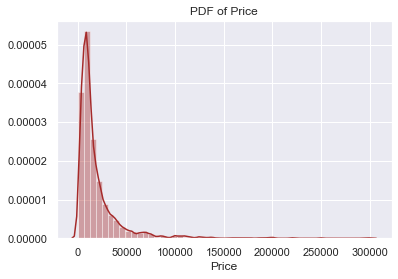

In [16]:
sns.distplot(data_no_mv['Price'], color='brown').set(title='PDF of Price')

[Text(0.5, 1.0, 'PDF of Price with quantile corections')]

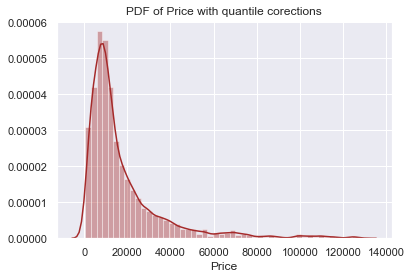

In [17]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
sns.distplot(data_1['Price'], color='brown').set(title='PDF of Price with quantile corections')

#### PDF of Mileage

[Text(0.5, 1.0, 'PDF of Mileage')]

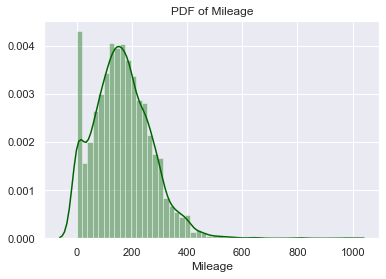

In [18]:
sns.distplot(data_1['Mileage'], color='darkgreen').set(title='PDF of Mileage')

[Text(0.5, 1.0, 'PDF of Mileage with quantile corections')]

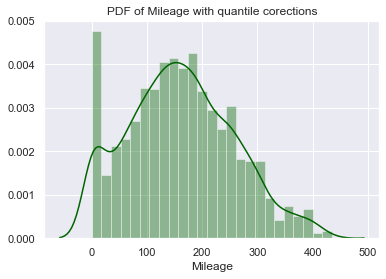

In [19]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'], color='darkgreen').set(title='PDF of Mileage with quantile corections')

#### PDF of EngineV

[Text(0.5, 1.0, 'PDF of EngineV')]

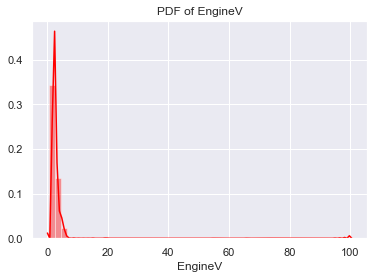

In [20]:
sns.distplot(data_2['EngineV'], color='red').set(title='PDF of EngineV')

C:\Users\cecep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[Text(0.5, 1.0, 'PDF of EngineV with quantile corections')]

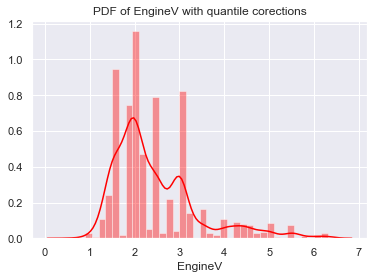

In [21]:
data_3 = data_2[data_1['EngineV']<6.5]
sns.distplot(data_3['EngineV'], color='red').set(title='PDF of EngineV with quantile corections')

#### PDF of Year

[Text(0.5, 1.0, 'PDF of Year')]

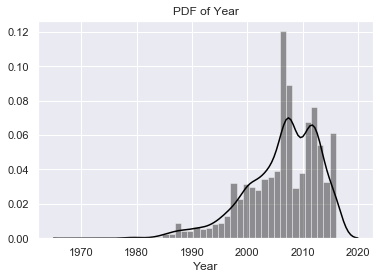

In [22]:
sns.distplot(data_3['Year'], color='black').set(title='PDF of Year')

[Text(0.5, 1.0, 'PDF of Year with quantile corections')]

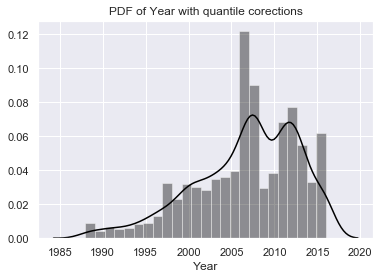

In [23]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'], color='black').set(title='PDF of Year with quantile corections')

### Reset Index

In [24]:
data_clean = data_4.reset_index(drop=True)
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

#### All of data with the relationship between Price - Mileage/EngineV/Year

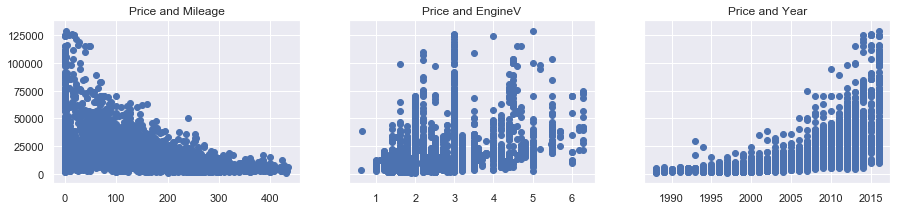

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_clean['Mileage'], data_clean['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_clean['EngineV'], data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Year'], data_clean['Price'])
ax3.set_title('Price and Year')

plt.show()

[Text(0.5, 1.0, 'PDF of Price')]

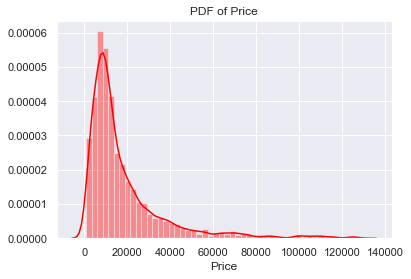

In [26]:
sns.distplot(data_clean['Price'], color='red').set(title='PDF of Price')

### Relaxing the assumptions

In [27]:
log_price = np.log(data_clean['Price'])

data_clean['Log_Price'] = log_price
data_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


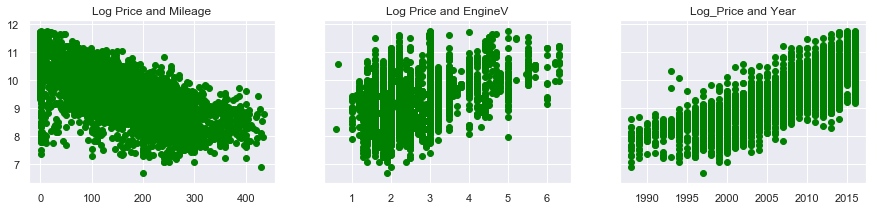

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_clean['Mileage'], data_clean['Log_Price'], c='green')
ax1.set_title('Log Price and Mileage')
ax2.scatter(data_clean['EngineV'], data_clean['Log_Price'], c='green')
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_clean['Year'], data_clean['Log_Price'], c='green')
ax3.set_title('Log_Price and Year')

plt.show()

## Multicollinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [30]:
data_no_multicollinearity = data_clean.drop(['Year'], axis=1)
data_no_multicollinearity.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656


## Creating Dummy Variables

In [31]:
data_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_dummies.head()

,Price,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [32]:
data_dummies.columns

Index(['Price', 'Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [33]:
cols = ['Log_Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_preprocess = data_dummies[cols]
data_preprocess.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare independent and dependent variable

In [35]:
y = data_preprocess['Log_Price']
x = data_preprocess.drop(['Log_Price'], axis=1)

In [36]:
y.head()

0     8.342840
1     8.974618
2     9.495519
3    10.043249
4     9.814656
Name: Log_Price, dtype: float64

In [37]:
x.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Scale the data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
scale = sc.transform(x)
scale[0:5]

array([[ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
        -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
         1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069,  2.03023504, -0.29105409,
        -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        -0.78182479, -0.32624802,  2.31070211, -0.41493781, -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069,  2.03023504, -0.29105409,
        -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
         1.27905896, -0.32624802, -0.43276889,  2.40999971, -0.16209221,
        -0.75037043,  0.32137366],
       [ 0.83096311,  1.84311   , -0.43865069, -0.49255381, -0.29105409,
        -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        -0.78182479, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
         1.33267512

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=365)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (3093, 17) (3093,)
Test set:  (774, 17) (774,)


### Creating the regression

#### Train  data

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pred_reg = reg.predict(x_train)

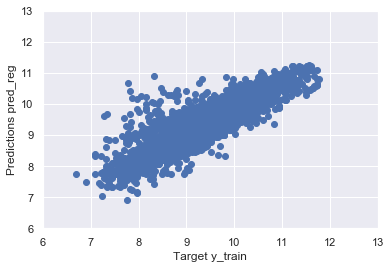

In [43]:
plt.scatter(y_train, pred_reg)
plt.xlabel('Target y_train')
plt.ylabel('Predictions pred_reg')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

[Text(0.5, 1.0, 'PDF of Residual Train')]

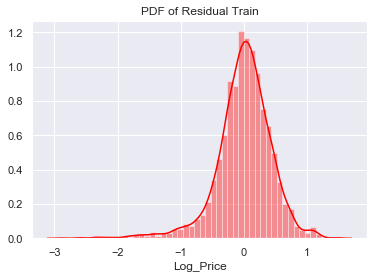

In [44]:
residual = y_train - pred_reg
sns.distplot(residual, color='red').set(title='PDF of Residual Train')

#### Finding std, bias, and weight

In [45]:
# STD
reg.score(x_train, y_train)

0.744996578792662

In [46]:
# Bias / intercept
reg.intercept_

9.304582140750977

In [47]:
# Weights / coefficient
reg.coef_

array([-0.00469263,  0.220212  ,  0.03873566,  0.0324979 , -0.52381377,
       -0.57111309, -0.18076831, -0.2173311 , -0.5882892 , -0.34486661,
       -0.41347478, -0.44050048, -0.46254013, -0.34320264, -0.21126668,
       -0.30601747,  1.1001902 ])

In [48]:
reg_train_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_train_summary['Weights'] = reg.coef_
reg_train_summary

,Features,Weights
0,Mileage,-0.004693
1,EngineV,0.220212
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


In [49]:
data_clean['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### Test data

In [50]:
pred_reg_test = reg.predict(x_test)

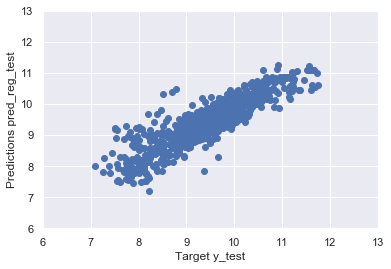

In [51]:
plt.scatter(y_test, pred_reg_test)
plt.xlabel('Target y_test')
plt.ylabel('Predictions pred_reg_test')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

[Text(0.5, 1.0, 'PDF of Residual Test')]

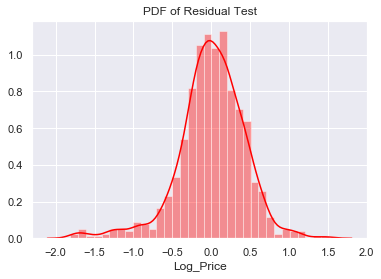

In [52]:
residual_test = y_test - pred_reg_test
sns.distplot(residual_test, color='red').set(title='PDF of Residual Test')

In [53]:
pd.DataFrame(pred_reg_test).head()

,0
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


#### Changing to original data for pred_reg_test

In [54]:
df_pred_test = pd.DataFrame(data=np.exp(pred_reg_test), columns=['Prediction'])
df_pred_test.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [55]:
pd.DataFrame(y_test).head()

,Log_Price
1192,7.740664
3360,7.937375
2350,7.824046
3257,8.764053
892,9.121509


#### Changing to original data and Reset Index for y_test

In [56]:
df_pred_test['Target'] = np.exp(y_test)
df_pred_test.head()

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN


In [57]:
y_test = y_test.reset_index(drop=True)
pd.DataFrame(y_test).head()

,Log_Price
0,7.740664
1,7.937375
2,7.824046
3,8.764053
4,9.121509


In [58]:
df_pred_test['Target'] = np.exp(y_test)
df_pred_test.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [59]:
df_pred_test['Residual Test'] = df_pred_test['Target'] - df_pred_test['Prediction']
df_pred_test['Diff %'] = np.absolute(df_pred_test['Residual Test']/df_pred_test['Target']*100)
df_pred_test.head()

,Prediction,Target,Residual Test,Diff %
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [60]:
df_pred_test.shape

(774, 4)

In [61]:
pd.set_option('precision',3)
pd.options.display.max_rows=800
df_pred_test.sort_values(by=['Diff %'])

,Prediction,Target,Residual Test,Diff %
698,30480.848,30500.00,19.152,0.063
742,16960.310,16999.00,38.690,0.228
60,12469.207,12500.00,30.793,0.246
110,25614.138,25500.00,-114.138,0.448
367,42703.677,42500.00,-203.677,0.479
369,3084.688,3100.00,15.312,0.494
769,29651.726,29500.00,-151.726,0.514
272,9749.525,9800.00,50.475,0.515
714,23118.072,22999.00,-119.072,0.518
630,8734.578,8800.00,65.422,0.743
